In [19]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
url = 'https://raw.githubusercontent.com/xlisouski/DataCoder/main/Titanic.csv'
df = pd.read_csv(url, sep = ',')

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Tuneando un gráfico de barras 

In [22]:
df_n = df[['Survived','Sex','Pclass']].groupby(by=['Sex','Pclass']).sum()
df_n

Survived
Sex    Pclass          
female 1             91
       2             70
       3             72
male   1             45
       2             17
       3             47

In [23]:
df_n = df[['Survived','Sex','Pclass']].groupby(by=['Sex','Pclass']).sum().reset_index()
df_n

,Sex,Pclass,Survived
0,female,1,91
1,female,2,70
2,female,3,72
3,male,1,45
4,male,2,17
5,male,3,47


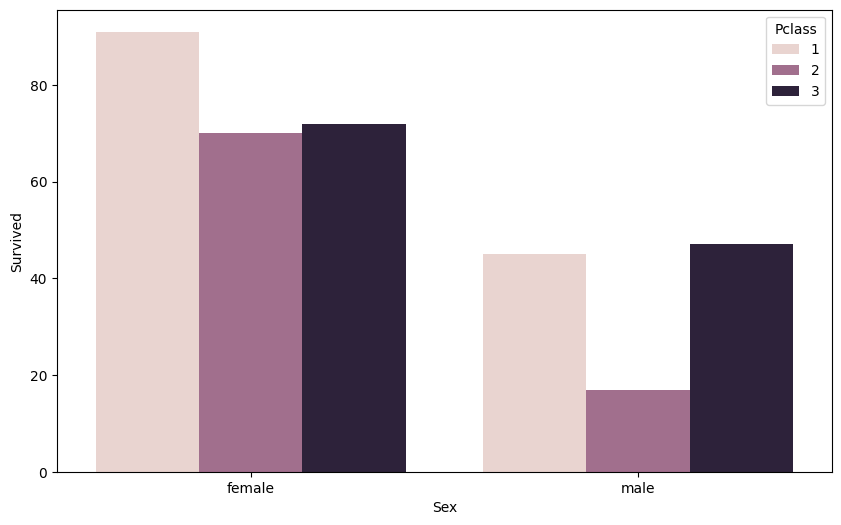

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(y = 'Survived', x = 'Sex', hue = 'Pclass', data = df_n)
plt.show()

C:\Users\u634093\AppData\Local\Temp\ipykernel_31788\2000345605.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(nuevas_etiquetas_x)


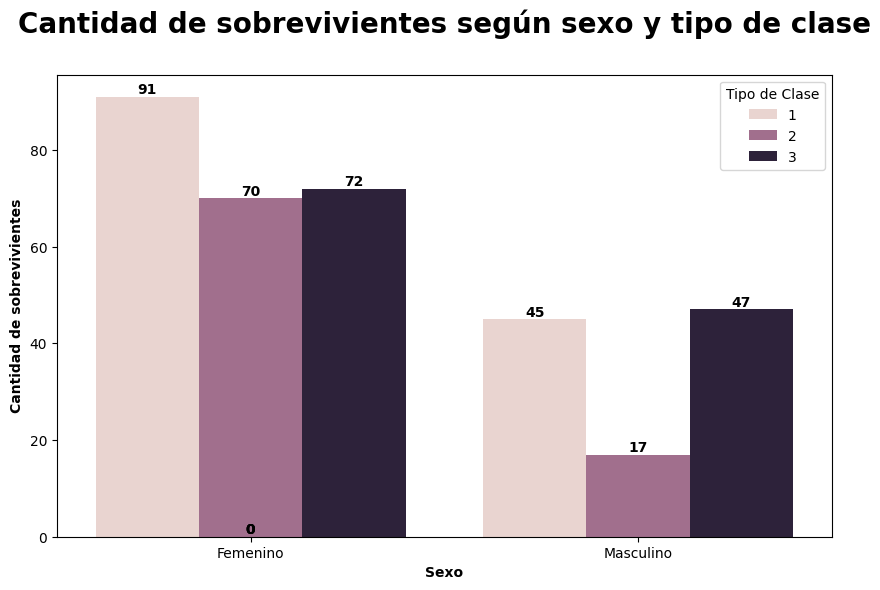

In [31]:
plt.figure(figsize=(10,6))
sns.barplot(y = 'Survived', x = 'Sex', hue = 'Pclass', data = df_n)
plt.title("Cantidad de sobrevivientes según sexo y tipo de clase", 
             fontsize = 20, fontweight = 'bold', pad = 30)
plt.xlabel('Sexo', fontweight = 'bold')
nuevas_etiquetas_x = ["Femenino", "Masculino"]
ax = plt.gca()
ax.set_xticklabels(nuevas_etiquetas_x)
plt.ylabel('Cantidad de sobrevivientes', fontweight = 'bold')
plt.legend(title = 'Tipo de Clase')
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0  # Calcula la posición x del texto
    y_text = p.get_height()  # Toma la altura de la columna
    ax.text(x_text, y_text, f'{int(y_text)}', # Indica posición x e y, y texto a mostrar 
            ha = 'center', # Alineación horizontal 
            va = 'bottom',  # Alineación vertical
            fontsize = 10, color = 'black', fontweight = 'bold')
plt.show()

# Análisis de correlación

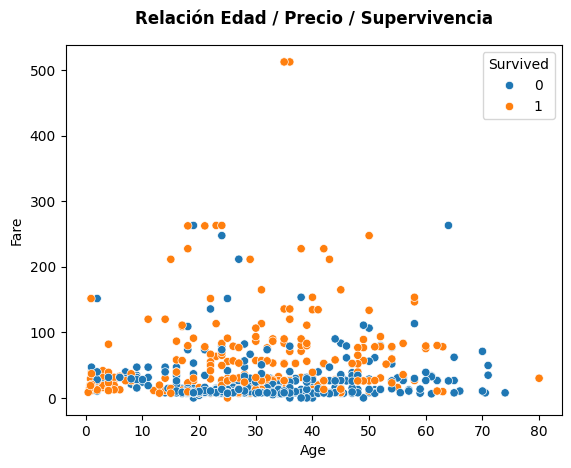

In [36]:
# Correlación 
plt.figure()
sns.scatterplot(data = df,
                x = 'Age',
                y = 'Fare',
                hue = 'Survived')
plt.title("Relación Edad / Precio / Supervivencia", 
             fontsize = 12, fontweight = 'bold', pad = 15)
plt.show()

In [37]:
# Saco Outliers 
percentil_95_fare = df['Fare'].quantile(0.95)
percentil_95_fare


112.07915

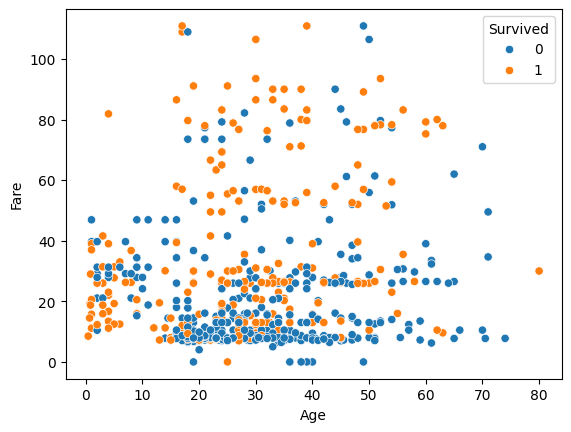

In [38]:
# Primero: Calculo percentil 95 de la variable que muestra altos valores extremos
percentil_95_fare = df['Fare'].quantile(0.95)

# Hago el gráfico filtrando el df para quedarme con los registros con valores menores al percentil 95
plt.figure()
sns.scatterplot(data = df[(df['Fare'] < percentil_95_fare)],
                x = 'Age',
                y = 'Fare',
                hue = 'Survived')
plt.show()

In [41]:
correlacion = df['Age'].corr(df['Fare'])
print('Coeficiente de Correlación: ',round(correlacion,3))

Coeficiente de Correlación:  0.096


In [44]:
# Matriz de correlacion
df[['Age','Fare','Pclass']].corr(method='pearson').round(3)

,Age,Fare,Pclass
Age,1.000,0.096,-0.369
Fare,0.096,1.000,-0.549
Pclass,-0.369,-0.549,1.000


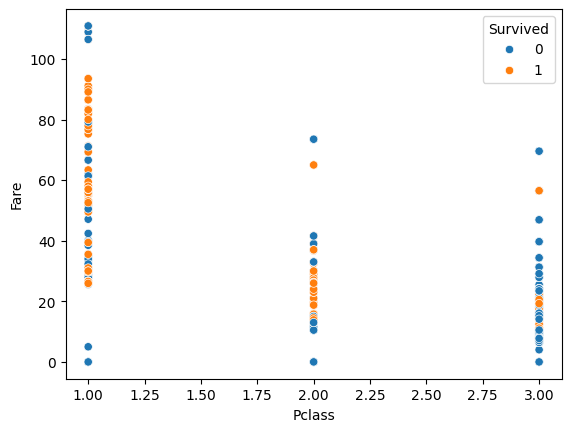

In [45]:
# Primero: Calculo percentil 95 de la variable que muestra altos valores extremos
percentil_95_fare = df['Fare'].quantile(0.95)

# Hago el gráfico filtrando el df para quedarme con los registros con valores menores al percentil 95
plt.figure()
sns.scatterplot(data = df[(df['Fare'] < percentil_95_fare)],
                x = 'Pclass',
                y = 'Fare',
                hue = 'Survived')
plt.show()

# Análisis en 3D


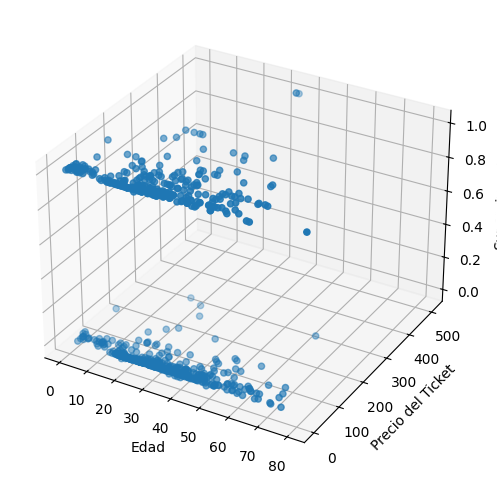

In [46]:
# Más de dos dimensiones 
# Grafico en 3d
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection = '3d')

x = df['Age']
y = df['Fare']
z = df['Survived']

ax.set_xlabel("Edad")
ax.set_ylabel("Precio del Ticket")
ax.set_zlabel("Supervivencia")

ax.scatter(x, y, z)

plt.show()


# Gráfico radar 
A tener en cuenta, las métricas que se quieren graficar DEBEN ESTAR EN LA MISMA ESCALA! Sino no se entiende.

In [47]:
# Grafico radar
categorias = ['Pct_chicos', 'Pct_Clase_1', 'Pct_Clase_2','Pct_Clase_3', 'Pct_Mujeres']

Pct_chicos = (df['Age'] <= 15).sum() / df['Pclass'].count()
Pct_Clase_1 = (df['Pclass'] == 1).sum() / df['Pclass'].count()
Pct_Clase_2 = (df['Pclass'] == 2).sum() / df['Pclass'].count()
Pct_Clase_3 = (df['Pclass'] == 3).sum() / df['Pclass'].count()
Pct_Mujeres = (df['Sex'] == 'female').sum() / df['Pclass'].count()

In [53]:
Pct_Clase_3 + Pct_Clase_1 + Pct_Clase_2

1.0

In [69]:
(df['Age'] <= 15).mean()

0.0931537598204265

In [70]:
(df['Age'] <= 15).sum() / (df['Age'] <= 15).count() 

0.0931537598204265

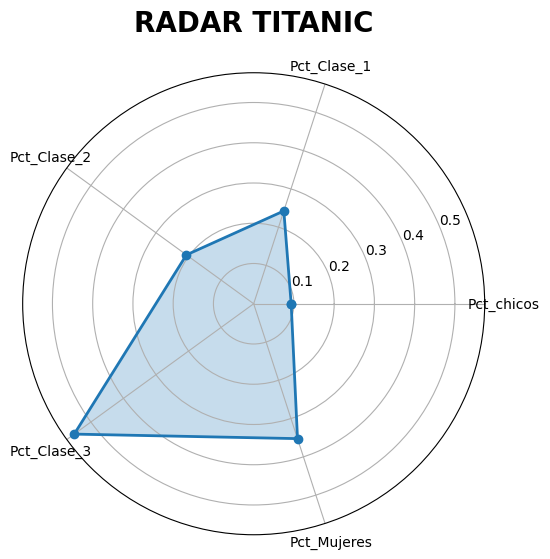

In [56]:
# Grafico radar
categorias = ['Pct_chicos', 'Pct_Clase_1', 'Pct_Clase_2','Pct_Clase_3', 'Pct_Mujeres']

Pct_chicos = (df['Age'] <= 15).sum() / df['Pclass'].count()
Pct_Clase_1 = (df['Pclass'] == 1).sum() / df['Pclass'].count()
Pct_Clase_2 = (df['Pclass'] == 2).sum() / df['Pclass'].count()
Pct_Clase_3 = (df['Pclass'] == 3).sum() / df['Pclass'].count()
Pct_Mujeres = (df['Sex'] == 'female').sum() / df['Pclass'].count()

valores = [Pct_chicos, Pct_Clase_1, Pct_Clase_2, Pct_Clase_3, Pct_Mujeres]

# Calcular el ángulo para cada categoría
num_categorias = len(categorias)
angulos = np.linspace(0, 2 * np.pi, num_categorias, endpoint=False).tolist()
angulos += angulos[:1]

# Agregar el primer valor al final para cerrar el gráfico
valores += valores[:1]

# Crear el gráfico radar
radar = plt.figure(figsize=(6, 6))
plt.polar(angulos, valores, 'o-', linewidth=2)

# Personalizar los ángulos y etiquetas en el eje radial
plt.xticks(angulos[:-1], categorias)

# Rellenar el área bajo el gráfico radar
plt.fill(angulos, valores, alpha=0.25)

plt.title("RADAR TITANIC", 
             fontsize = 20, fontweight = 'bold', pad = 30)

# Mostrar el gráfico
plt.show()

<PolarAxes: >

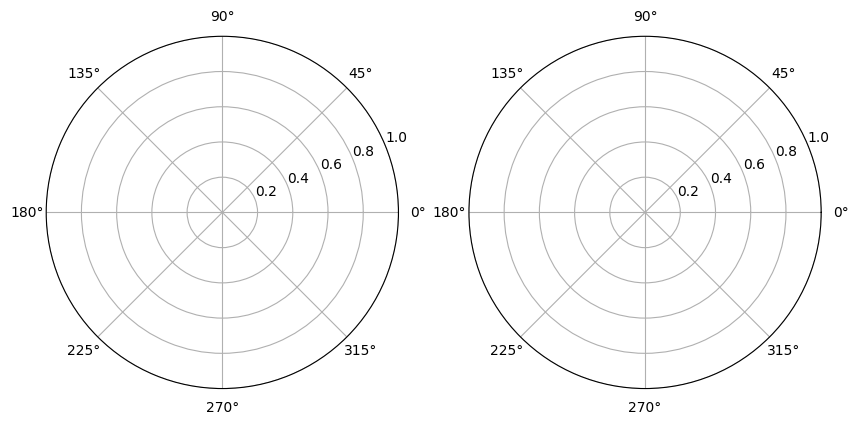

In [57]:
# Grafico radar por categorias 
# ESTRUCTURA:
#### DEFINO FIGURA
plt.figure(figsize= (10, 5))

#### PRIMER GRAFICO
plt.subplot(1, 2, 1,polar=True)

#### SEGUNDO GRAFICO
plt.subplot(1, 2, 2,polar=True)

In [58]:


# Primero: Genero variables booleanas de interes 
df['Es_chico'] = df['Age'] <= 15
df['Es_Clase_1'] = df['Pclass'] == 1
df['Es_Clase_2'] = df['Pclass'] == 2
df['Es_Clase_3'] = df['Pclass'] == 3
df['Es_Mujer'] = df['Sex'] == 'female'


In [60]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Es_chico,Es_Clase_1,Es_Clase_2,Es_Clase_3,Es_Mujer
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,False,True,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,False,False,True,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,True,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,False,False,True,False


In [62]:
# Segundo: Genero el group by para calcular mis metricas
valores_agrupados = df.groupby('Survived')[['Es_chico','Es_Clase_1','Es_Clase_2','Es_Clase_3',
                                            'Es_Mujer']].mean().reset_index()

valores_agrupados

,Survived,Es_chico,Es_Clase_1,Es_Clase_2,Es_Clase_3,Es_Mujer
0,0,0.061931,0.145719,0.176685,0.677596,0.147541
1,1,0.143275,0.397661,0.254386,0.347953,0.681287


In [64]:
# Tercero: Melteo el group by 
df_melted = pd.melt(valores_agrupados, 
                    id_vars = ['Survived'], 
                    var_name = 'Caracteristica', 
                    value_name = 'Valor')

df_melted = pd.DataFrame(df_melted)
df_melted


,Survived,Caracteristica,Valor
0,0,Es_chico,0.061931
1,1,Es_chico,0.143275
2,0,Es_Clase_1,0.145719
3,1,Es_Clase_1,0.397661
4,0,Es_Clase_2,0.176685
5,1,Es_Clase_2,0.254386
6,0,Es_Clase_3,0.677596
7,1,Es_Clase_3,0.347953
8,0,Es_Mujer,0.147541
9,1,Es_Mujer,0.681287


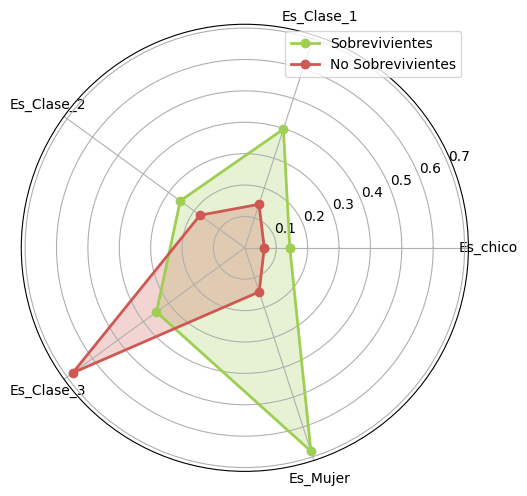

In [65]:
plt.figure(figsize= (10, 5))

#### PRIMER GRAFICO

plt.subplot(1, 2, 1,polar=True)

# Survived = 1
df_melted_1 = df_melted.loc[df_melted['Survived'] == 1,]
categorias = list(df_melted_1['Caracteristica'])
valores = list(df_melted_1['Valor'])

# Calcular el ángulo para cada categoría
num_categorias = len(categorias)
angulos = np.linspace(0, 2 * np.pi, num_categorias, endpoint=False).tolist()
angulos += angulos[:1]

# Agregar el primer valor al final para cerrar el gráfico
valores += valores[:1]

# Crear el gráfico radar
plt.polar(angulos, valores, 'o-', linewidth=2,label='Sobrevivientes',color = '#9ECF52')

# Personalizar los ángulos y etiquetas en el eje radial
plt.xticks(angulos[:-1], categorias)

# Rellenar el área bajo el gráfico radar
plt.fill(angulos, valores, alpha=0.25,color = '#9ECF52')

# Ajustar el diseño de la figura
plt.tight_layout()


#### SEGUNDO GRAFICO
plt.subplot(1, 2, 1,polar=True)

# Survived = 1
df_melted_1 = df_melted.loc[df_melted['Survived'] == 0,]
categorias = list(df_melted_1['Caracteristica'])
valores = list(df_melted_1['Valor'])

# Calcular el ángulo para cada categoría
num_categorias = len(categorias)
angulos = np.linspace(0, 2 * np.pi, num_categorias, endpoint=False).tolist()
angulos += angulos[:1]

# Agregar el primer valor al final para cerrar el gráfico
valores += valores[:1]

# Crear el gráfico radar
plt.polar(angulos, valores, 'o-', linewidth=2,label='No Sobrevivientes',color = '#CF5852')

# Personalizar los ángulos y etiquetas en el eje radial
plt.xticks(angulos[:-1], categorias)

# Rellenar el área bajo el gráfico radar
plt.fill(angulos, valores, alpha=0.25,color = '#CF5852')

# Ajustar el diseño de la figura
plt.tight_layout()

# Muestro legendas
plt.legend()

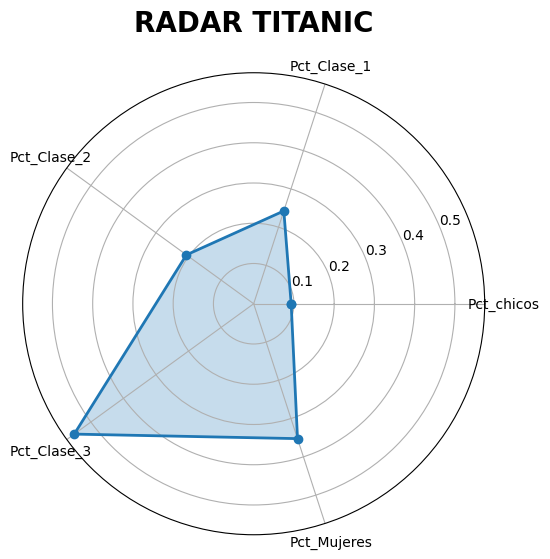

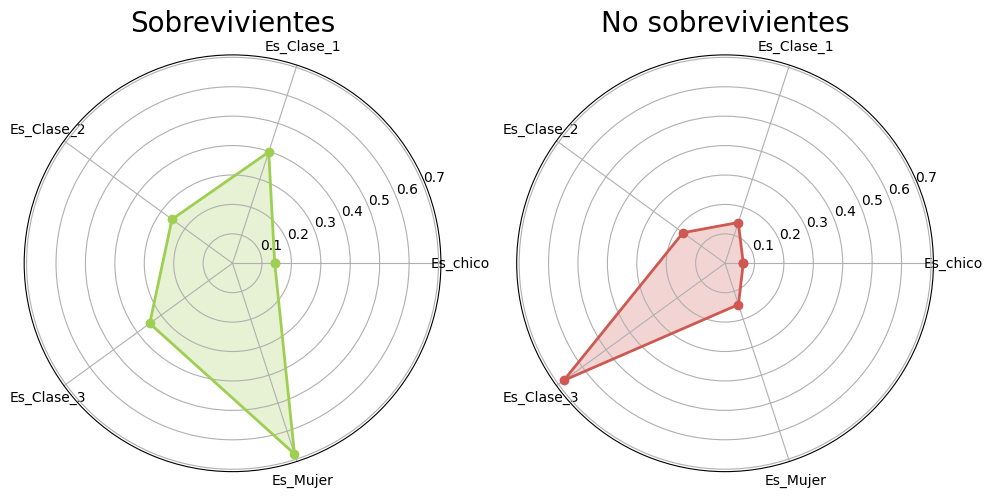

In [71]:
plt.figure(figsize= (10, 5))

#### PRIMER GRAFICO

plt.subplot(1, 2, 1,polar=True)

# Survived = 1
df_melted_1 = df_melted.loc[df_melted['Survived'] == 1,]
categorias = list(df_melted_1['Caracteristica'])
valores = list(df_melted_1['Valor'])

# Calcular el ángulo para cada categoría
num_categorias = len(categorias)
angulos = np.linspace(0, 2 * np.pi, num_categorias, endpoint=False).tolist()
angulos += angulos[:1]

# Agregar el primer valor al final para cerrar el gráfico
valores += valores[:1]

# Crear el gráfico radar
plt.polar(angulos, valores, 'o-', linewidth=2,color = '#9ECF52')

# Personalizar los ángulos y etiquetas en el eje radial
plt.xticks(angulos[:-1], categorias)

# Rellenar el área bajo el gráfico radar
plt.fill(angulos, valores, alpha=0.25,color = '#9ECF52')

# Ajustar el diseño de la figura
plt.tight_layout()
plt.title('Sobrevivientes',size=20)


#### SEGUNDO GRAFICO
plt.subplot(1, 2, 2,polar=True)

# Survived = 1
df_melted_1 = df_melted.loc[df_melted['Survived'] == 0,]
categorias = list(df_melted_1['Caracteristica'])
valores = list(df_melted_1['Valor'])

# Calcular el ángulo para cada categoría
num_categorias = len(categorias)
angulos = np.linspace(0, 2 * np.pi, num_categorias, endpoint=False).tolist()
angulos += angulos[:1]

# Agregar el primer valor al final para cerrar el gráfico
valores += valores[:1]

# Crear el gráfico radar
plt.polar(angulos, valores, 'o-', linewidth=2,color = '#CF5852')

# Personalizar los ángulos y etiquetas en el eje radial
plt.xticks(angulos[:-1], categorias)

# Rellenar el área bajo el gráfico radar
plt.fill(angulos, valores, alpha=0.25,color = '#CF5852')

# Ajustar el diseño de la figura
plt.tight_layout()
plt.title('No sobrevivientes',size=20)

radar